In [37]:
import math
import numpy
import pandas

# Latex in print output.
from IPython.display import display, Math, Markdown

import matplotlib.pyplot as plt
%matplotlib inline

import os

import schemdraw as schem
from schemdraw import flow as f
import schemdraw.elements as e

schem.use('svg')

Discharge time of a capacitor is 5$\tau$.

\begin{equation}
\tau=RC
\end{equation}

There are a range of capacitor values, and resistor values that are practical to deal with. We will start with capacitor values, and calculate resistor values based upon them.

|Capacitor Values||
|---|---|
|1pF|10,000µF|

Target dischange time is 0.5s

In [29]:
tau = (0.5 / 5)
Cap = (tau / 1000000)
print("C Raw: {}F".format(Cap))
Cap = Cap * 1000000000
Res = (tau / (Cap / 1000000000) / 1000000)

print("Capacitance: {}pF".format(Cap))
print("Resistance: {}MΩ".format(Res))

C Raw: 1.0000000000000001e-07F
Capacitance: 100.00000000000001pF
Resistance: 1.0MΩ


***

Current Max for the Raspbeery Pi GPIO is 16mA, and the voltage is 3.3V

In [32]:
Res = 3.3 / 0.016
print("Resistance for 8mA @ 3.3V: {}".format(Res))

Resistance for 8mA @ 3.3V: 206.24999999999997


\begin{equation}
R=\frac{V}{I}=\frac{3.3V}{0.008A}=206.3Ω
\end{equation}

\begin{equation}
I = \frac{V_{Pi}-V_{LED}}{R}=\frac{3.3V-1.7V}{200Ω}=0.008A=8mA
\end{equation}

***

### Resource Link: A kit that has all components plus more.

https://www.amazon.com/OSOYOO-Electronic-Components-Package-Total/dp/B01MZ87USD/ref=sr_1_1_sspa?crid=C04U73GCKIY4&keywords=capacitor+kit&qid=1645608193&sprefix=capacitor+kit%2Caps%2C88&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEyMDVMUEpYWDYyWVYwJmVuY3J5cHRlZElkPUEwNDc2OTU3MUY3WkRLMVNLSTFINyZlbmNyeXB0ZWRBZElkPUEwMDc0MTU4MTNTWVZZRlVYVk1WJndpZGdldE5hbWU9c3BfYXRmJmFjdGlvbj1jbGlja1JlZGlyZWN0JmRvTm90TG9nQ2xpY2s9dHJ1ZQ==

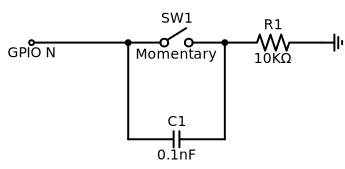

In [87]:
img = schem.Drawing()

img += e.Dot(open='True').label('GPIO N', loc='bottom')
img += e.Line()
img.push()
img += e.Dot()
img += e.Line().down()
img += (c1 := e.Capacitor().label('C1').label('0.1nF', loc='bottom').right())
img += e.Line().up()
img += e.Dot()
img.pop()
img += (sw1 := e.Switch().label('SW1').label('Momentary', loc='bottom'))
img += (r1 := e.Resistor().label('R1').label('10KΩ', loc='bottom'))
img += e.Ground().up()

img.save('interfacing_basics_img01.svg')
os.system("inkscape -f interfacing_basics_img01.svg -A interfacing_basics_img01.pdf 2> /dev/null");
img.draw()

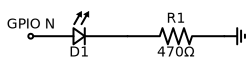

In [91]:
img = schem.Drawing()

img += e.Dot(open='True').label('GPIO N')
img += e.LED().label('D1')
img += e.Resistor().label('R1').label('470Ω', loc='bottom')
img += e.Ground().up()

img.save('interfacing_basics_img02.svg')
os.system("inkscape -f interfacing_basics_img02.svg -A interfacing_basics_img02.pdf 2> /dev/null");
img.draw()

In [93]:
os.system("inkscape -f interfacing_basics_bb.svg -A interfacing_basics_bb.pdf 2> /dev/null");

In [94]:
os.system("inkscape -f ../images/gpiopinsv3withpi.svg -A ../images/gpiopinsv3withpi.pdf 2> /dev/null");